In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/workspaces/retail-analysis/data/raw/2025-11-08/Retail_Dataset2.csv')

print(f'data head: \n{df.head()}')
print(f'data tail:  \n{df.tail()}')
print(f'data columns:  \n{df.columns}')
print(f'data numerical cols statistical values:  \n{df.describe()}')
print(f'data summary:  \n{df.info()}')

data head: 
   Product_id  Product_Code Warehouse Product_Category        Date  \
0      786725  Product_0033    Whse_S     Category_005  01/03/2016   
1      786743  Product_1825    Whse_S     Category_006  01/03/2016   
2      786967  Product_0551    Whse_S     Category_030  01/03/2016   
3      786856  Product_0556    Whse_S     Category_030  01/03/2016   
4      899538  Product_1844    Whse_A     Category_018  01/03/2016   

   Order_Demand  Open  Promo StateHoliday  SchoolHoliday  Petrol_price  
0         16000     1      0            0              0            91  
1         50000     1      0            0              0            85  
2          3000     1      0            0              0            85  
3          1000     1      0            0              0            93  
4             7     1      0            0              0            95  
data tail:  
        Product_id  Product_Code Warehouse Product_Category        Date  \
169206      993496  Product_1368    Whse_

In [5]:
#inspect column names and type
print(df.columns)
df.dtypes

Index(['Product_id', 'Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Petrol_price'],
      dtype='object')


Product_id           int64
Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand         int64
Open                 int64
Promo                int64
StateHoliday        object
SchoolHoliday        int64
Petrol_price         int64
dtype: object

In [6]:
#inspecting missing data
print(df.isna().sum())
((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

Product_id          0
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Petrol_price        0
dtype: int64


Product_id          0.0
Product_Code        0.0
Warehouse           0.0
Product_Category    0.0
Date                0.0
Order_Demand        0.0
Open                0.0
Promo               0.0
StateHoliday        0.0
SchoolHoliday       0.0
Petrol_price        0.0
dtype: float64

In [7]:
#check for duplicates
print(df.duplicated().sum())

#inspecting duplicateas
df[df.duplicated()]

0


,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price


In [8]:
#check numerical column
num_col = df.select_dtypes(include=['int64','float64']).columns
print(num_col)

for col in num_col:
    print(col, (df[col]<0).sum())

Index(['Product_id', 'Order_Demand', 'Open', 'Promo', 'SchoolHoliday',
       'Petrol_price'],
      dtype='object')
Product_id 0
Order_Demand 0
Open 0
Promo 0
SchoolHoliday 0
Petrol_price 0


In [9]:
#check categorical columns
cat_col = df.select_dtypes(include=['object']).columns

for cat in cat_col:
    print(cat)
    print(df[cat].value_counts())
    print('-' * 50)

Product_Code
Product_Code
Product_1359    2607
Product_1378    1674
Product_1295    1627
Product_1382    1467
Product_1453    1450
                ... 
Product_1086       1
Product_0575       1
Product_1811       1
Product_0853       1
Product_2117       1
Name: count, Length: 2117, dtype: int64
--------------------------------------------------
Warehouse
Warehouse
Whse_J    131102
Whse_A     23157
Whse_C      9142
Whse_S      5810
Name: count, dtype: int64
--------------------------------------------------
Product_Category
Product_Category
Category_019    76640
Category_005    17831
Category_001    17599
Category_007    12643
Category_021     7890
Category_006     5877
Category_028     4972
Category_015     3672
Category_011     3255
Category_009     3245
Category_024     2987
Category_026     2892
Category_030     2144
Category_023     1314
Category_032     1250
Category_022      965
Category_018      856
Category_003      793
Category_013      521
Category_012      407
Category_033 

In [10]:
#explore date time columns

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#check date range
print(df['Date'].max(), df['Date'].min())

2016-11-23 00:00:00 2016-01-03 00:00:00


KeyError: "None of [Index([(16000, 50000, 3000, 1000, 7, 2000, 2, 300, 3000, 5000, 20, 15000, 100, 10, 16, 400, 10000, 1, 40, 0, 1000, 10000, 0, 1800, 0, 10000, 5000, 8, 5000, 600, 20, 1000, 11, 0, 10000, 1000, 6000, 600, 1, 20000, 5000, 5000, 2, 357, 180, 1, 42, 2000, 2000, 1000, 150000, 24, 100000, 48, 12000, 50, 13, 21, 926, 50, 217, 1090, 0, 3, 0, 50, 463, 28, 2, 2, 1, 1, 2, 5000, 18, 100, 2, 40, 1000, 6000, 2, 740000, 100, 120, 60, 61000, 66000, 22, 7, 1, 10000, 14, 100, 20, 8, 22, 1000, 1000, 1000, 600, ...)], dtype='object')] are in the [columns]"

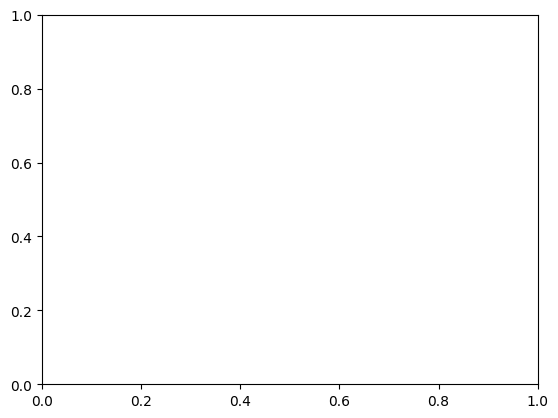

In [4]:
#quick visualisation
import matplotlib.pyplot as plt

#boxplot to see outliers
df.boxplot(df['Order_Demand'])

#time series 
df.groupby('Date')['Order_Demand'].sum().plot()
plt.show()